# **Preprocessing**

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 9.7 MB/s eta 0:00:000m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


pip install tensorflow

In [1]:
import pandas as pd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Class Proportions:
diabetes: 513 non_diabetes: 502


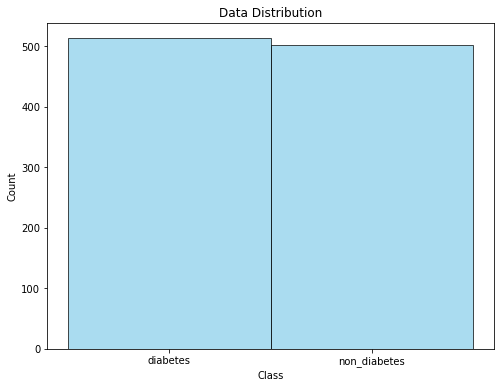

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/lab5/Desktop/tongue_diabetes_new"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Normal and Tuberculosis)
for class_name in ['diabetes', 'non_diabetes']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Normal, 1 for Tuberculosis) to the labels list
        labels.append(0 if class_name == 'diabetes' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("diabetes:", np.sum(labels == 0), "non_diabetes:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


# Equal amount of data is taken

In [3]:
# Separate data for Normal and Tuberculosis classes
diabetes_images = images[labels == 0][:500]
non_diabetes_images = images[labels == 1][:500]
diabetes_labels = labels[labels == 0][:500]
non_diabetes_labels = labels[labels == 1][:500]

# Concatenate the data back together
balanced_images = np.concatenate([diabetes_images, non_diabetes_images])
balanced_labels = np.concatenate([diabetes_labels, non_diabetes_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

#print the balanced data
print("Balanced Images:",balanced_images.shape)
print("Balanced labels:",balanced_labels.shape)

#print the data seperately of each class
print("diabetes_images:",diabetes_images.shape)
print("non_diabetes_images:",non_diabetes_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1000, 224, 224)
Balanced labels: (1000,)
diabetes_images: (500, 224, 224)
non_diabetes_images: (500, 224, 224)
X_train shape: (800, 224, 224)
X_test shape: (200, 224, 224)
y_train shape: (800,)
y_test shape: (200,)


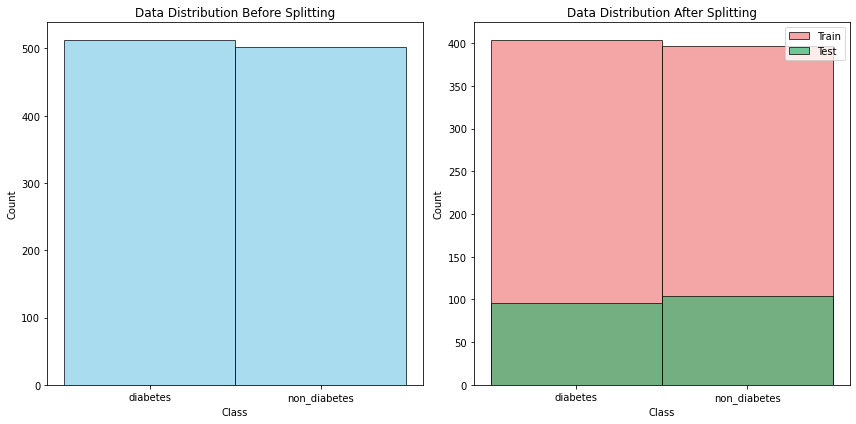

In [4]:
# Plot histogram for class distribution before splitting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution Before Splitting')

# Plot histogram for class distribution after splitting
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, color='lightcoral', edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test, bins=2, color='mediumseagreen', edgecolor='black', alpha=0.7, label='Test')
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution After Splitting')
plt.legend()

plt.tight_layout()
plt.show()


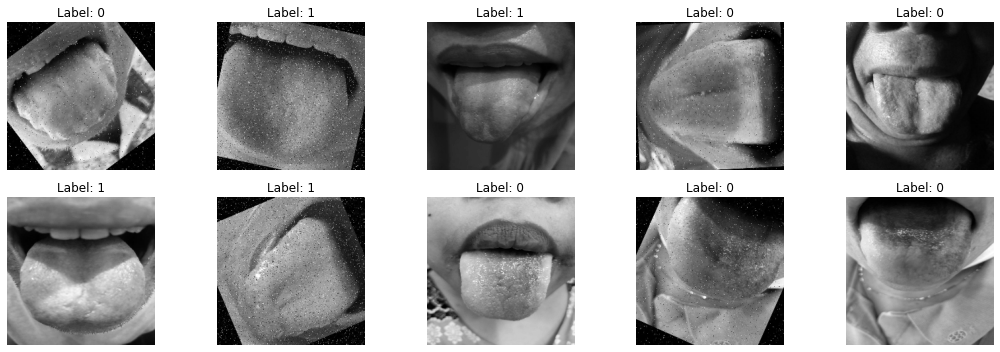

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i % 5 + 1 + (i // 5) * 5)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

In [6]:
images[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Yes, you can add other layers or modify the architecture of the custom classification head in various ways, depending on the specific requirements of your task. Here are some common modifications:

1. **Dropout Layers**: Adding dropout layers can help prevent overfitting. Dropout layers randomly set a fraction of input units to 0 at each update during training, which helps prevent overfitting.

   Example:
   ```python
   x = Dropout(0.5)(x)  # Add dropout with a dropout rate of 0.5
   ```

2. **Batch Normalization**: Batch normalization normalizes the input layer by adjusting and scaling the activations. It can help with faster convergence and better generalization.

   Example:
   ```python
   x = BatchNormalization()(x)
   ```

3. **Additional Dense Layers**: Adding more dense layers can increase the model's capacity to learn complex patterns in the data. However, adding too many layers can lead to overfitting.

   Example:
   ```python
   x = Dense(256, activation='relu')(x)
   ```

4. **Different Activation Functions**: You can experiment with different activation functions in the dense layers. Common choices include `sigmoid`, `tanh`, and `relu`.

   Example:
   ```python
   x = Dense(512, activation='tanh')(x)
   ```

5. **Regularization**: You can add regularization to the dense layers to prevent overfitting. Common regularization techniques include L1 regularization, L2 regularization, and dropout.

   Example:
   ```python
   from tensorflow.keras import regularizers
   x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
   ```

These modifications can be added to the custom classification head after the `GlobalAveragePooling2D` layer to customize the model according to your needs. The choice of layers and their configurations should be based on the specific requirements of your task and the characteristics of your dataset.

# OverFitting  and UnderFitting Identification


Overfitting occurs when a machine learning model learns the training data too well, to the point that it negatively impacts its performance on unseen data. To identify overfitting, you can use several techniques:

1. **Validation Curve**: Plot the training and validation accuracies or losses against the number of epochs. If the training accuracy keeps increasing while the validation accuracy stagnates or starts decreasing, it indicates overfitting.

2. **Learning Curve**: Plot the training and validation accuracies or losses against the size of the training dataset. If the training and validation curves converge at a low error, the model is underfitting. If they diverge, the model may be overfitting.

3. **Validation Set Performance**: Evaluate the model on a separate validation set during training. If the validation accuracy starts to decrease while the training accuracy keeps increasing, the model is likely overfitting.

4. **Regularization Techniques**: Regularization techniques like L1 and L2 regularization, dropout, and early stopping can help prevent overfitting. If you observe a significant improvement in performance with these techniques, it indicates that overfitting was present.

5. **Cross-Validation**: Use k-fold cross-validation to assess the model's performance on different subsets of the data. If the model performs significantly better on the training data compared to the validation data, it suggests overfitting.

6. **Model Complexity**: If you have control over the model architecture, reducing the complexity (e.g., number of layers, number of units per layer) can help prevent overfitting.

7. **Data Augmentation**: If applicable, augmenting the training data can help improve the model's generalization performance by exposing it to more variations in the data.

By monitoring these indicators, you can identify and mitigate overfitting in your machine learning models.

# Xception(A) + Dense Layers (B):

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5591 - auc_16: 0.5619 - auc_17: 0.5184 - false_negatives_8: 88.0385 - false_positives_8: 94.2692 - loss: 12.0389 - precision_8: 0.5390 - recall_8: 0.5765 - true_negatives_8: 128.1538 - true_positives_8: 120.3077 - val_accuracy: 0.7700 - val_auc_16: 0.8206 - val_auc_17: 0.7558 - val_false_negatives_8: 2.0000 - val_false_positives_8: 44.0000 - val_loss: 2.2132 - val_precision_8: 0.6986 - val_recall_8: 0.9808 - val_true_negatives_8: 52.0000 - val_true_positives_8: 102.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8350 - auc_16: 0.8741 - auc_17: 0.8349 - false_negatives_8: 39.9231 - false_positives_8: 32.5000 - loss: 1.2416 - precision_8: 0.8373 - recall_8: 0.8120 - true_negatives_8: 189.9231 - true_positives_8: 168.4231 - val_accuracy: 0.8300 - val_auc_16: 0.8849 - val_auc_17: 0.8396 - val_false_negatives_8: 5.0000 - val_false_positives_8: 29.0000 - val_loss: 1.2347 - val_precision_8: 0.7734 - val_recal

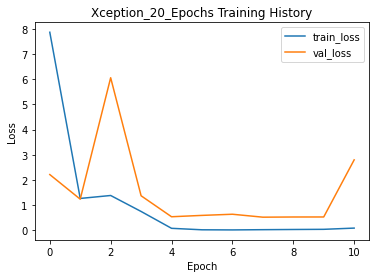

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with Xception base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception_20_Epochs Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5615 - auc_6: 0.5650 - auc_7: 0.5278 - false_negatives_3: 93.9231 - false_positives_3: 84.5385 - loss: 13.2002 - precision_3: 0.5462 - recall_3: 0.5100 - true_negatives_3: 137.8846 - true_positives_3: 114.4231 - val_accuracy: 0.7600 - val_auc_6: 0.8941 - val_auc_7: 0.9257 - val_false_negatives_3: 47.0000 - val_false_positives_3: 1.0000 - val_loss: 1.0081 - val_precision_3: 0.9828 - val_recall_3: 0.5481 - val_true_negatives_3: 95.0000 - val_true_positives_3: 57.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8333 - auc_6: 0.9072 - auc_7: 0.8964 - false_negatives_3: 39.5000 - false_positives_3: 36.3846 - loss: 0.7322 - precision_3: 0.8425 - recall_3: 0.8073 - true_negatives_3: 186.0385 - true_positives_3: 168.8462 - val_accuracy: 0.8750 - val_auc_6: 0.9420 - val_auc_7: 0.9405 - val_false_negatives_3: 8.0000 - val_false_positives_3: 17.0000 - val_loss: 0.4230 - val_precision_3: 0.8496 - val_recall_3: 0.92

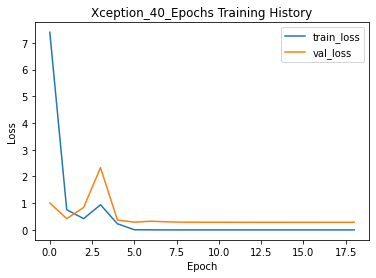

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with Xception base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception_40_Epochs Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.5405 - auc_8: 0.5333 - auc_9: 0.5044 - false_negatives_4: 93.2692 - false_positives_4: 93.1538 - loss: 10.7789 - precision_4: 0.5222 - recall_4: 0.5272 - true_negatives_4: 129.2692 - true_positives_4: 115.0769 - val_accuracy: 0.6500 - val_auc_8: 0.7751 - val_auc_9: 0.8441 - val_false_negatives_4: 69.0000 - val_false_positives_4: 1.0000 - val_loss: 3.2843 - val_precision_4: 0.9722 - val_recall_4: 0.3365 - val_true_negatives_4: 95.0000 - val_true_positives_4: 35.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8430 - auc_8: 0.9053 - auc_9: 0.8918 - false_negatives_4: 36.4615 - false_positives_4: 28.3077 - loss: 1.1094 - precision_4: 0.8746 - recall_4: 0.7947 - true_negatives_4: 194.1154 - true_positives_4: 171.8846 - val_accuracy: 0.8000 - val_auc_8: 0.8602 - val_auc_9: 0.8017 - val_false_negatives_4: 3.0000 - val_false_positives_4: 37.0000 - val_loss: 1.5294 - val_precision_4: 0.7319 - val_recall_4: 0.97

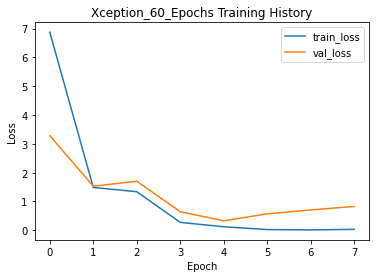

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with Xception base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception_60_Epochs Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.4948 - auc_18: 0.5191 - auc_19: 0.4908 - false_negatives_9: 107.3462 - false_positives_9: 95.1538 - loss: 10.3607 - precision_9: 0.4662 - recall_9: 0.4314 - true_negatives_9: 127.2692 - true_positives_9: 101.0000 - val_accuracy: 0.7050 - val_auc_18: 0.7660 - val_auc_19: 0.7042 - val_false_negatives_9: 4.0000 - val_false_positives_9: 55.0000 - val_loss: 2.6406 - val_precision_9: 0.6452 - val_recall_9: 0.9615 - val_true_negatives_9: 41.0000 - val_true_positives_9: 100.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.7661 - auc_18: 0.8392 - auc_19: 0.8139 - false_negatives_9: 48.9231 - false_positives_9: 50.6923 - loss: 1.4353 - precision_9: 0.7472 - recall_9: 0.7822 - true_negatives_9: 171.7308 - true_positives_9: 159.4231 - val_accuracy: 0.6950 - val_auc_18: 0.7961 - val_auc_19: 0.8603 - val_false_negatives_9: 61.0000 - val_false_positives_9: 0.0000e+00 - val_loss: 2.4056 - val_precision_9: 1.0000 - val_

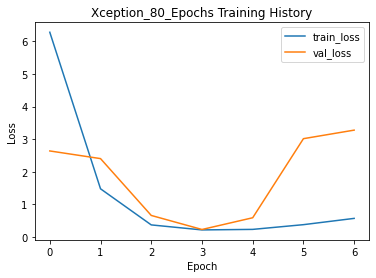

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with Xception base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception_80_Epochs Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.5406 - auc_12: 0.5507 - auc_13: 0.5143 - false_negatives_6: 96.5000 - false_positives_6: 92.2308 - loss: 13.8784 - precision_6: 0.5230 - recall_6: 0.5128 - true_negatives_6: 130.1923 - true_positives_6: 111.8462 - val_accuracy: 0.7450 - val_auc_12: 0.8049 - val_auc_13: 0.7522 - val_false_negatives_6: 8.0000 - val_false_positives_6: 43.0000 - val_loss: 1.9914 - val_precision_6: 0.6906 - val_recall_6: 0.9231 - val_true_negatives_6: 53.0000 - val_true_positives_6: 96.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8031 - auc_12: 0.8589 - auc_13: 0.8269 - false_negatives_6: 40.2692 - false_positives_6: 45.2692 - loss: 1.5413 - precision_6: 0.7803 - recall_6: 0.8205 - true_negatives_6: 177.1538 - true_positives_6: 168.0769 - val_accuracy: 0.7700 - val_auc_12: 0.8662 - val_auc_13: 0.9146 - val_false_negatives_6: 46.0000 - val_false_positives_6: 0.0000e+00 - val_loss: 1.6853 - val_precision_6: 1.0000 - val_

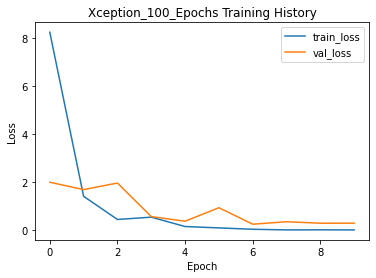

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with Xception base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception_100_Epochs Training History")
plt.show()


In [21]:
num_training_records = X_train_resized.shape[0]
print("Number of training records:", num_training_records)


Number of training records: 800


# Xception+Dropout+Dense Layers

2024-03-24 11:48:35.317565: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 11:48:35.318805: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-24 11:48:35.373327: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-24 11:48:35.619028: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 11:48:36.496510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.6030 - auc: 0.6093 - auc_1: 0.5615 - false_negatives: 83.9615 - false_positives: 77.5769 - loss: 19.4794 - precision: 0.5873 - recall: 0.5826 - true_negatives: 144.8462 - true_positives: 124.3846 - val_accuracy: 0.8300 - val_auc: 0.8849 - val_auc_1: 0.8532 - val_false_negatives: 10.0000 - val_false_positives: 24.0000 - val_loss: 1.4174 - val_precision: 0.7966 - val_recall: 0.9038 - val_true_negatives: 72.0000 - val_true_positives: 94.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8232 - auc: 0.8493 - auc_1: 0.8032 - false_negatives: 40.8462 - false_positives: 39.0000 - loss: 2.9843 - precision: 0.8150 - recall: 0.8138 - true_negatives: 183.4231 - true_positives: 167.5000 - val_accuracy: 0.8150 - val_auc: 0.8891 - val_auc_1: 0.9163 - val_false_negatives: 33.0000 - val_false_positives: 4.0000 - val_loss: 1.1484 - val_precision: 0.9467 - val_recall: 0.6827 - val_true_negatives: 92.0000 - val_true_positiv

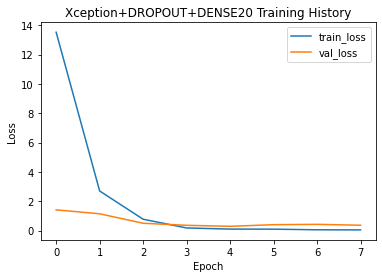

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Model details
model_details = {
    'Model': 'Xception+DROPOUT+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+DROPOUT+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+DROPOUT+DENSE20 Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5510 - auc_2: 0.5503 - auc_3: 0.5164 - false_negatives_1: 96.9231 - false_positives_1: 87.0000 - loss: 23.9421 - precision_1: 0.5336 - recall_1: 0.5108 - true_negatives_1: 135.4231 - true_positives_1: 111.4231 - val_accuracy: 0.7150 - val_auc_2: 0.7700 - val_auc_3: 0.8241 - val_false_negatives_1: 55.0000 - val_false_positives_1: 2.0000 - val_loss: 4.0153 - val_precision_1: 0.9608 - val_recall_1: 0.4712 - val_true_negatives_1: 94.0000 - val_true_positives_1: 49.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7583 - auc_2: 0.7961 - auc_3: 0.7765 - false_negatives_1: 66.3077 - false_positives_1: 41.3462 - loss: 3.6532 - precision_1: 0.8095 - recall_1: 0.6595 - true_negatives_1: 181.0769 - true_positives_1: 142.0385 - val_accuracy: 0.8150 - val_auc_2: 0.8537 - val_auc_3: 0.7946 - val_false_negatives_1: 4.0000 - val_false_positives_1: 33.0000 - val_loss: 1.6819 - val_precision_1: 0.7519 - val_recall_1: 0.96

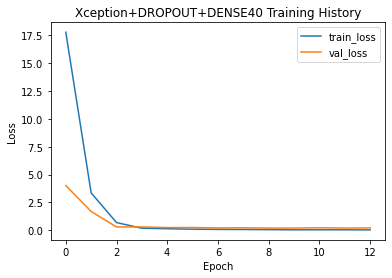

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Model details
model_details = {
    'Model': 'Xception+DROPOUT+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+DROPOUT+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+DROPOUT+DENSE40 Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.6099 - auc_4: 0.6207 - auc_5: 0.5782 - false_negatives_2: 78.5769 - false_positives_2: 80.4615 - loss: 14.1583 - precision_2: 0.5906 - recall_2: 0.6051 - true_negatives_2: 141.9615 - true_positives_2: 129.7692 - val_accuracy: 0.7750 - val_auc_4: 0.8110 - val_auc_5: 0.8391 - val_false_negatives_2: 38.0000 - val_false_positives_2: 7.0000 - val_loss: 3.0626 - val_precision_2: 0.9041 - val_recall_2: 0.6346 - val_true_negatives_2: 89.0000 - val_true_positives_2: 66.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8496 - auc_4: 0.8869 - auc_5: 0.8609 - false_negatives_2: 34.5000 - false_positives_2: 33.8077 - loss: 1.8151 - precision_2: 0.8503 - recall_2: 0.8329 - true_negatives_2: 188.6154 - true_positives_2: 173.8462 - val_accuracy: 0.7650 - val_auc_4: 0.8785 - val_auc_5: 0.9214 - val_false_negatives_2: 46.0000 - val_false_positives_2: 1.0000 - val_loss: 1.8803 - val_precision_2: 0.9831 - val_recall_2: 0.55

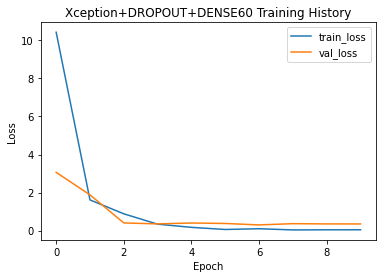

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Model details
model_details = {
    'Model': 'Xception+DROPOUT+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+DROPOUT+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+DROPOUT+DENSE60 Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5941 - auc_6: 0.6002 - auc_7: 0.5549 - false_negatives_3: 87.1154 - false_positives_3: 74.5769 - loss: 18.4864 - precision_3: 0.5823 - recall_3: 0.5404 - true_negatives_3: 147.8462 - true_positives_3: 121.2308 - val_accuracy: 0.8600 - val_auc_6: 0.8582 - val_auc_7: 0.8094 - val_false_negatives_3: 6.0000 - val_false_positives_3: 22.0000 - val_loss: 1.6591 - val_precision_3: 0.8167 - val_recall_3: 0.9423 - val_true_negatives_3: 74.0000 - val_true_positives_3: 98.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8209 - auc_6: 0.8634 - auc_7: 0.8169 - false_negatives_3: 39.2308 - false_positives_3: 42.8077 - loss: 1.8935 - precision_3: 0.8043 - recall_3: 0.8277 - true_negatives_3: 179.6154 - true_positives_3: 169.1154 - val_accuracy: 0.8550 - val_auc_6: 0.9161 - val_auc_7: 0.9331 - val_false_negatives_3: 25.0000 - val_false_positives_3: 4.0000 - val_loss: 0.8060 - val_precision_3: 0.9518 - val_recall_3: 0.75

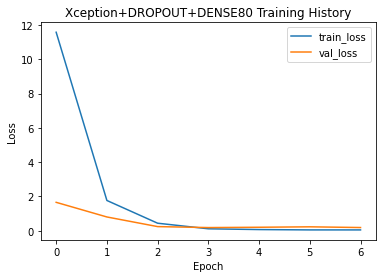

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Model details
model_details = {
    'Model': 'Xception+DROPOUT+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+DROPOUT+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+DROPOUT+DENSE80 Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.6154 - auc_8: 0.6156 - auc_9: 0.5689 - false_negatives_4: 84.0769 - false_positives_4: 75.7308 - loss: 18.6127 - precision_4: 0.6019 - recall_4: 0.5790 - true_negatives_4: 146.6923 - true_positives_4: 124.2692 - val_accuracy: 0.8200 - val_auc_8: 0.8466 - val_auc_9: 0.7993 - val_false_negatives_4: 10.0000 - val_false_positives_4: 26.0000 - val_loss: 1.7948 - val_precision_4: 0.7833 - val_recall_4: 0.9038 - val_true_negatives_4: 70.0000 - val_true_positives_4: 94.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8262 - auc_8: 0.8599 - auc_9: 0.8096 - false_negatives_4: 34.5000 - false_positives_4: 45.4231 - loss: 2.0613 - precision_4: 0.7945 - recall_4: 0.8579 - true_negatives_4: 177.0000 - true_positives_4: 173.8462 - val_accuracy: 0.7950 - val_auc_8: 0.9052 - val_auc_9: 0.9366 - val_false_negatives_4: 40.0000 - val_false_positives_4: 1.0000 - val_loss: 1.0457 - val_precision_4: 0.9846 - val_recall_4: 0

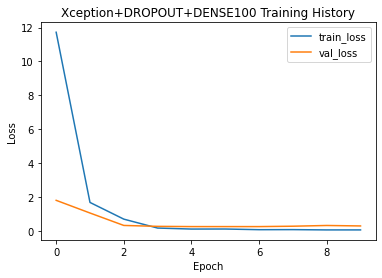

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Model details
model_details = {
    'Model': 'Xception+DROPOUT+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+DROPOUT+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+DROPOUT+DENSE100 Training History")
plt.show()


# Xception+GAP2D+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5987 - auc_10: 0.6518 - auc_11: 0.6156 - false_negatives_5: 91.1154 - false_positives_5: 72.8846 - loss: 0.6877 - precision_5: 0.5909 - recall_5: 0.5273 - true_negatives_5: 149.5385 - true_positives_5: 117.2308 - val_accuracy: 0.6850 - val_auc_10: 0.9041 - val_auc_11: 0.9070 - val_false_negatives_5: 61.0000 - val_false_positives_5: 2.0000 - val_loss: 0.5566 - val_precision_5: 0.9556 - val_recall_5: 0.4135 - val_true_negatives_5: 94.0000 - val_true_positives_5: 43.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7686 - auc_10: 0.8736 - auc_11: 0.8572 - false_negatives_5: 55.8077 - false_positives_5: 41.6154 - loss: 0.4652 - precision_5: 0.8045 - recall_5: 0.6926 - true_negatives_5: 180.8077 - true_positives_5: 152.5385 - val_accuracy: 0.8000 - val_auc_10: 0.9297 - val_auc_11: 0.9351 - val_false_negatives_5: 35.0000 - val_false_positives_5: 5.0000 - val_loss: 0.4098 - val_precision_5: 0.9324 - val_recall_

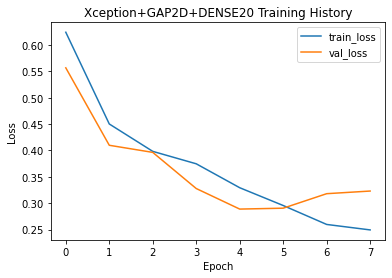

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with Xception
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+GAP2D+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+GAP2D+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+GAP2D+DENSE20 Training History")
plt.show()



Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5797 - auc_12: 0.6119 - auc_13: 0.5571 - false_negatives_6: 91.6923 - false_positives_6: 80.7308 - loss: 0.7332 - precision_6: 0.5653 - recall_6: 0.5292 - true_negatives_6: 141.6923 - true_positives_6: 116.6538 - val_accuracy: 0.7300 - val_auc_12: 0.8930 - val_auc_13: 0.8963 - val_false_negatives_6: 50.0000 - val_false_positives_6: 4.0000 - val_loss: 0.5186 - val_precision_6: 0.9310 - val_recall_6: 0.5192 - val_true_negatives_6: 92.0000 - val_true_positives_6: 54.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7480 - auc_12: 0.8691 - auc_13: 0.8553 - false_negatives_6: 67.6538 - false_positives_6: 37.8462 - loss: 0.4748 - precision_6: 0.8136 - recall_6: 0.6253 - true_negatives_6: 184.5769 - true_positives_6: 140.6923 - val_accuracy: 0.8250 - val_auc_12: 0.9232 - val_auc_13: 0.9295 - val_false_negatives_6: 22.0000 - val_false_positives_6: 13.0000 - val_loss: 0.3723 - val_precision_6: 0.8632 - val_recall

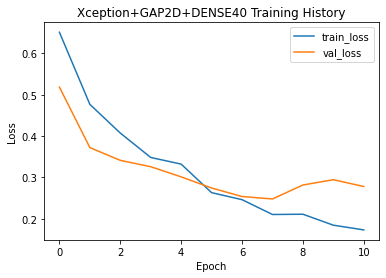

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with Xception
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+GAP2D+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+GAP2D+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+GAP2D+DENSE40 Training History")
plt.show()



Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5541 - auc_14: 0.5734 - auc_15: 0.5292 - false_negatives_7: 98.4615 - false_positives_7: 80.3846 - loss: 0.7773 - precision_7: 0.5400 - recall_7: 0.4689 - true_negatives_7: 142.0385 - true_positives_7: 109.8846 - val_accuracy: 0.7700 - val_auc_14: 0.8739 - val_auc_15: 0.8700 - val_false_negatives_7: 36.0000 - val_false_positives_7: 10.0000 - val_loss: 0.4952 - val_precision_7: 0.8718 - val_recall_7: 0.6538 - val_true_negatives_7: 86.0000 - val_true_positives_7: 68.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7719 - auc_14: 0.8563 - auc_15: 0.8433 - false_negatives_7: 59.3077 - false_positives_7: 40.8846 - loss: 0.4812 - precision_7: 0.7993 - recall_7: 0.6981 - true_negatives_7: 181.5385 - true_positives_7: 149.0385 - val_accuracy: 0.8200 - val_auc_14: 0.9207 - val_auc_15: 0.9235 - val_false_negatives_7: 28.0000 - val_false_positives_7: 8.0000 - val_loss: 0.3938 - val_precision_7: 0.9048 - val_recall

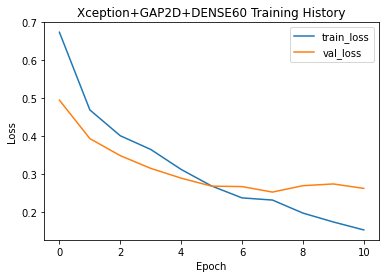

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with Xception
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+GAP2D+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+GAP2D+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+GAP2D+DENSE60 Training History")
plt.show()



Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5319 - auc_16: 0.5643 - auc_17: 0.5272 - false_negatives_8: 102.4231 - false_positives_8: 82.6923 - loss: 0.8082 - precision_8: 0.5047 - recall_8: 0.4378 - true_negatives_8: 139.7308 - true_positives_8: 105.9231 - val_accuracy: 0.7800 - val_auc_16: 0.8753 - val_auc_17: 0.8760 - val_false_negatives_8: 16.0000 - val_false_positives_8: 28.0000 - val_loss: 0.4863 - val_precision_8: 0.7586 - val_recall_8: 0.8462 - val_true_negatives_8: 68.0000 - val_true_positives_8: 88.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7759 - auc_16: 0.8544 - auc_17: 0.8363 - false_negatives_8: 56.8462 - false_positives_8: 40.9231 - loss: 0.4861 - precision_8: 0.7912 - recall_8: 0.7195 - true_negatives_8: 181.5000 - true_positives_8: 151.5000 - val_accuracy: 0.8250 - val_auc_16: 0.9168 - val_auc_17: 0.9251 - val_false_negatives_8: 22.0000 - val_false_positives_8: 13.0000 - val_loss: 0.3876 - val_precision_8: 0.8632 - val_reca

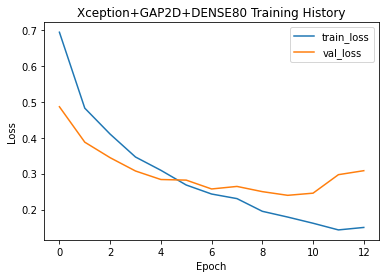

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with Xception
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+GAP2D+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+GAP2D+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+GAP2D+DENSE80 Training History")
plt.show()



Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5978 - auc_18: 0.6452 - auc_19: 0.6066 - false_negatives_9: 89.9231 - false_positives_9: 71.4615 - loss: 0.6789 - precision_9: 0.5911 - recall_9: 0.5319 - true_negatives_9: 150.9615 - true_positives_9: 118.4231 - val_accuracy: 0.7150 - val_auc_18: 0.9048 - val_auc_19: 0.9076 - val_false_negatives_9: 54.0000 - val_false_positives_9: 3.0000 - val_loss: 0.5263 - val_precision_9: 0.9434 - val_recall_9: 0.4808 - val_true_negatives_9: 93.0000 - val_true_positives_9: 50.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7818 - auc_18: 0.8709 - auc_19: 0.8441 - false_negatives_9: 55.9615 - false_positives_9: 37.3077 - loss: 0.4699 - precision_9: 0.8277 - recall_9: 0.6956 - true_negatives_9: 185.1154 - true_positives_9: 152.3846 - val_accuracy: 0.7950 - val_auc_18: 0.9244 - val_auc_19: 0.9295 - val_false_negatives_9: 36.0000 - val_false_positives_9: 5.0000 - val_loss: 0.4230 - val_precision_9: 0.9315 - val_recal

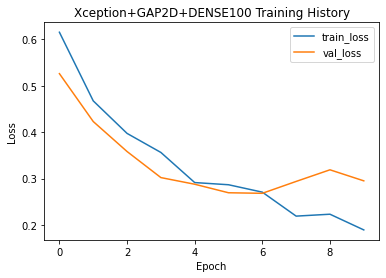

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with Xception
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+GAP2D+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+GAP2D+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+GAP2D+DENSE100 Training History")
plt.show()



# Xception+Conv2D+GAP2D+Dropout+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5531 - auc_20: 0.5514 - auc_21: 0.4940 - false_negatives_10: 100.0769 - false_positives_10: 88.6154 - loss: 0.8692 - precision_10: 0.5362 - recall_10: 0.5148 - true_negatives_10: 133.8077 - true_positives_10: 108.2692 - val_accuracy: 0.7400 - val_auc_20: 0.8191 - val_auc_21: 0.8471 - val_false_negatives_10: 36.0000 - val_false_positives_10: 16.0000 - val_loss: 0.5752 - val_precision_10: 0.8095 - val_recall_10: 0.6538 - val_true_negatives_10: 80.0000 - val_true_positives_10: 68.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6582 - auc_20: 0.7339 - auc_21: 0.7041 - false_negatives_10: 81.0000 - false_positives_10: 66.3846 - loss: 0.5948 - precision_10: 0.6507 - recall_10: 0.6120 - true_negatives_10: 156.0385 - true_positives_10: 127.3462 - val_accuracy: 0.8450 - val_auc_20: 0.9291 - val_auc_21: 0.9393 - val_false_negatives_10: 19.0000 - val_false_positives_10: 12.0000 - val_loss: 0.4488 - val_precision_

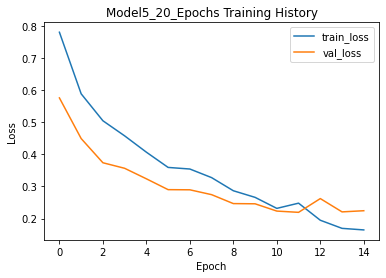

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with Xception and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+Conv2D+GLOBALAVGPOOL+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model5_20_Epochs Training History")
plt.show()



Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5311 - auc_22: 0.5338 - auc_23: 0.4913 - false_negatives_11: 109.9615 - false_positives_11: 92.1154 - loss: 0.8248 - precision_11: 0.5083 - recall_11: 0.4904 - true_negatives_11: 130.3077 - true_positives_11: 98.3846 - val_accuracy: 0.7450 - val_auc_22: 0.8261 - val_auc_23: 0.8453 - val_false_negatives_11: 44.0000 - val_false_positives_11: 7.0000 - val_loss: 0.6209 - val_precision_11: 0.8955 - val_recall_11: 0.5769 - val_true_negatives_11: 89.0000 - val_true_positives_11: 60.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6362 - auc_22: 0.7211 - auc_23: 0.6974 - false_negatives_11: 106.7308 - false_positives_11: 49.1923 - loss: 0.6235 - precision_11: 0.6692 - recall_11: 0.4629 - true_negatives_11: 173.2308 - true_positives_11: 101.6154 - val_accuracy: 0.7700 - val_auc_22: 0.8922 - val_auc_23: 0.8910 - val_false_negatives_11: 39.0000 - val_false_positives_11: 7.0000 - val_loss: 0.4797 - val_precision_11

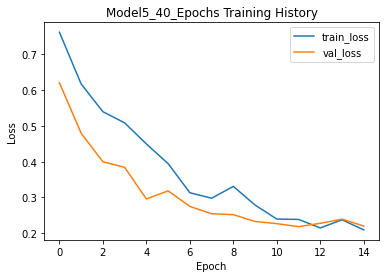

In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with Xception and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+Conv2D+GLOBALAVGPOOL+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model5_40_Epochs Training History")
plt.show()



Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5899 - auc_24: 0.5948 - auc_25: 0.5549 - false_negatives_12: 84.1154 - false_positives_12: 86.5769 - loss: 0.7473 - precision_12: 0.5689 - recall_12: 0.5979 - true_negatives_12: 135.8462 - true_positives_12: 124.2308 - val_accuracy: 0.7100 - val_auc_24: 0.8325 - val_auc_25: 0.8254 - val_false_negatives_12: 51.0000 - val_false_positives_12: 7.0000 - val_loss: 0.5830 - val_precision_12: 0.8833 - val_recall_12: 0.5096 - val_true_negatives_12: 89.0000 - val_true_positives_12: 53.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7060 - auc_24: 0.7962 - auc_25: 0.7689 - false_negatives_12: 61.7692 - false_positives_12: 60.7692 - loss: 0.5419 - precision_12: 0.7027 - recall_12: 0.6734 - true_negatives_12: 161.6538 - true_positives_12: 146.5769 - val_accuracy: 0.8200 - val_auc_24: 0.9120 - val_auc_25: 0.9069 - val_false_negatives_12: 26.0000 - val_false_positives_12: 10.0000 - val_loss: 0.3926 - val_precision_12

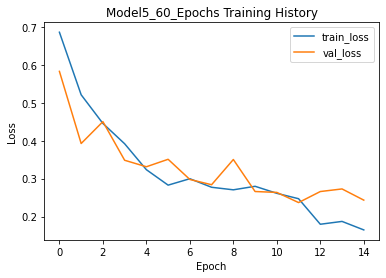

In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with Xception and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+Conv2D+GLOBALAVGPOOL+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model5_60_Epochs Training History")
plt.show()



Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5537 - auc_26: 0.5723 - auc_27: 0.5232 - false_negatives_13: 119.6923 - false_positives_13: 61.2692 - loss: 0.7729 - precision_13: 0.5486 - recall_13: 0.3860 - true_negatives_13: 161.1538 - true_positives_13: 88.6538 - val_accuracy: 0.6800 - val_auc_26: 0.8006 - val_auc_27: 0.7957 - val_false_negatives_13: 41.0000 - val_false_positives_13: 23.0000 - val_loss: 0.5437 - val_precision_13: 0.7326 - val_recall_13: 0.6058 - val_true_negatives_13: 73.0000 - val_true_positives_13: 63.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6664 - auc_26: 0.7507 - auc_27: 0.7270 - false_negatives_13: 71.5000 - false_positives_13: 68.3846 - loss: 0.5871 - precision_13: 0.6597 - recall_13: 0.6369 - true_negatives_13: 154.0385 - true_positives_13: 136.8462 - val_accuracy: 0.7850 - val_auc_26: 0.9242 - val_auc_27: 0.9297 - val_false_negatives_13: 36.0000 - val_false_positives_13: 7.0000 - val_loss: 0.4355 - val_precision_13

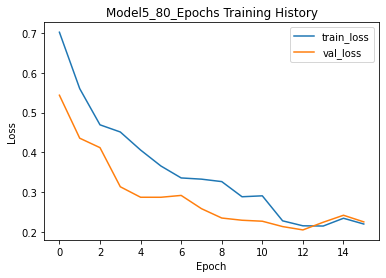

In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with Xception and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+Conv2D+GLOBALAVGPOOL+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model5_80_Epochs Training History")
plt.show()



Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5207 - auc_28: 0.5653 - auc_29: 0.5155 - false_negatives_14: 111.6154 - false_positives_14: 81.3846 - loss: 0.7327 - precision_14: 0.4965 - recall_14: 0.4105 - true_negatives_14: 141.0385 - true_positives_14: 96.7308 - val_accuracy: 0.7450 - val_auc_28: 0.8666 - val_auc_29: 0.8751 - val_false_negatives_14: 36.0000 - val_false_positives_14: 15.0000 - val_loss: 0.5097 - val_precision_14: 0.8193 - val_recall_14: 0.6538 - val_true_negatives_14: 81.0000 - val_true_positives_14: 68.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7163 - auc_28: 0.7852 - auc_29: 0.7549 - false_negatives_14: 57.9615 - false_positives_14: 66.0769 - loss: 0.5550 - precision_14: 0.6975 - recall_14: 0.7217 - true_negatives_14: 156.3462 - true_positives_14: 150.3846 - val_accuracy: 0.7700 - val_auc_28: 0.9278 - val_auc_29: 0.9325 - val_false_negatives_14: 43.0000 - val_false_positives_14: 3.0000 - val_loss: 0.4649 - val_precision_

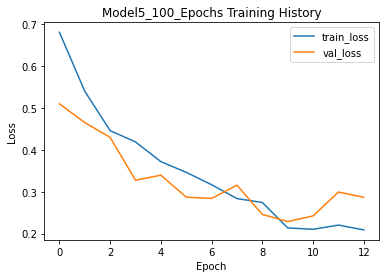

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with Xception and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+Conv2D+GLOBALAVGPOOL+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model5_100_Epochs Training History")
plt.show()



# Xception+LSTM+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6052 - auc_30: 0.6537 - auc_31: 0.5874 - false_negatives_15: 90.6154 - false_positives_15: 67.5769 - loss: 0.7088 - precision_15: 0.5980 - recall_15: 0.5474 - true_negatives_15: 154.8462 - true_positives_15: 117.7308 - val_accuracy: 0.7500 - val_auc_30: 0.8031 - val_auc_31: 0.7980 - val_false_negatives_15: 31.0000 - val_false_positives_15: 19.0000 - val_loss: 0.5535 - val_precision_15: 0.7935 - val_recall_15: 0.7019 - val_true_negatives_15: 77.0000 - val_true_positives_15: 73.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7672 - auc_30: 0.8548 - auc_31: 0.8339 - false_negatives_15: 59.0000 - false_positives_15: 44.8846 - loss: 0.5043 - precision_15: 0.7752 - recall_15: 0.7205 - true_negatives_15: 177.5385 - true_positives_15: 149.3462 - val_accuracy: 0.8200 - val_auc_30: 0.8830 - val_auc_31: 0.8736 - val_false_negatives_15: 19.0000 - val_false_positives_15: 17.0000 - val_loss: 0.4841 - val_precision_1

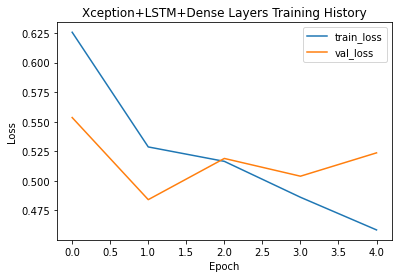

In [22]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (299, 299, 3)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
xception_output = base_model(input_layer, training=False)
flatten = Flatten()(xception_output)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+LSTM+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+LSTM+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+LSTM+Dense Layers Training History")
plt.show()



Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6029 - auc_32: 0.6583 - auc_33: 0.5996 - false_negatives_16: 119.8846 - false_positives_16: 42.2692 - loss: 0.6870 - precision_16: 0.6511 - recall_16: 0.3888 - true_negatives_16: 180.1538 - true_positives_16: 88.4615 - val_accuracy: 0.7800 - val_auc_32: 0.8441 - val_auc_33: 0.8308 - val_false_negatives_16: 14.0000 - val_false_positives_16: 30.0000 - val_loss: 0.5648 - val_precision_16: 0.7500 - val_recall_16: 0.8654 - val_true_negatives_16: 66.0000 - val_true_positives_16: 90.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7867 - auc_32: 0.8650 - auc_33: 0.8476 - false_negatives_16: 53.0385 - false_positives_16: 41.4231 - loss: 0.5360 - precision_16: 0.7918 - recall_16: 0.7468 - true_negatives_16: 181.0000 - true_positives_16: 155.3077 - val_accuracy: 0.7750 - val_auc_32: 0.8894 - val_auc_33: 0.9050 - val_false_negatives_16: 10.0000 - val_false_positives_16: 35.0000 - val_loss: 0.5226 - val_precision_1

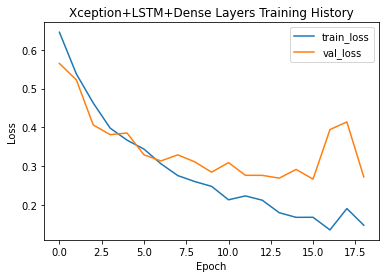

In [23]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (299, 299, 3)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
xception_output = base_model(input_layer, training=False)
flatten = Flatten()(xception_output)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+LSTM+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+LSTM+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+LSTM+Dense Layers Training History")
plt.show()



Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5722 - auc_34: 0.6498 - auc_35: 0.5784 - false_negatives_17: 117.6154 - false_positives_17: 53.5000 - loss: 0.6942 - precision_17: 0.5807 - recall_17: 0.4060 - true_negatives_17: 168.9231 - true_positives_17: 90.7308 - val_accuracy: 0.7950 - val_auc_34: 0.8665 - val_auc_35: 0.8779 - val_false_negatives_17: 21.0000 - val_false_positives_17: 20.0000 - val_loss: 0.5499 - val_precision_17: 0.8058 - val_recall_17: 0.7981 - val_true_negatives_17: 76.0000 - val_true_positives_17: 83.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7802 - auc_34: 0.8773 - auc_35: 0.8686 - false_negatives_17: 72.2308 - false_positives_17: 29.7308 - loss: 0.5172 - precision_17: 0.8387 - recall_17: 0.6674 - true_negatives_17: 192.6923 - true_positives_17: 136.1154 - val_accuracy: 0.8300 - val_auc_34: 0.9016 - val_auc_35: 0.9017 - val_false_negatives_17: 20.0000 - val_false_positives_17: 14.0000 - val_loss: 0.5066 - val_precision_1

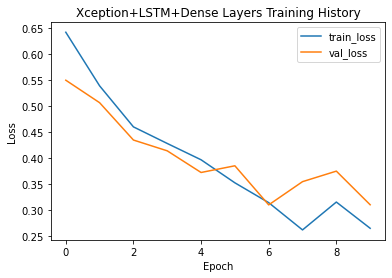

In [24]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (299, 299, 3)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
xception_output = base_model(input_layer, training=False)
flatten = Flatten()(xception_output)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+LSTM+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+LSTM+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+LSTM+Dense Layers Training History")
plt.show()



Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5299 - auc_36: 0.5545 - auc_37: 0.5261 - false_negatives_18: 101.1923 - false_positives_18: 90.2692 - loss: 0.7970 - precision_18: 0.5231 - recall_18: 0.5157 - true_negatives_18: 132.1538 - true_positives_18: 107.1538 - val_accuracy: 0.7400 - val_auc_36: 0.8234 - val_auc_37: 0.7890 - val_false_negatives_18: 7.0000 - val_false_positives_18: 45.0000 - val_loss: 0.5980 - val_precision_18: 0.6831 - val_recall_18: 0.9327 - val_true_negatives_18: 51.0000 - val_true_positives_18: 97.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6889 - auc_36: 0.7758 - auc_37: 0.7361 - false_negatives_18: 91.3462 - false_positives_18: 47.7308 - loss: 0.6070 - precision_18: 0.7039 - recall_18: 0.5989 - true_negatives_18: 174.6923 - true_positives_18: 117.0000 - val_accuracy: 0.7400 - val_auc_36: 0.8577 - val_auc_37: 0.8659 - val_false_negatives_18: 8.0000 - val_false_positives_18: 44.0000 - val_loss: 0.5586 - val_precision_18

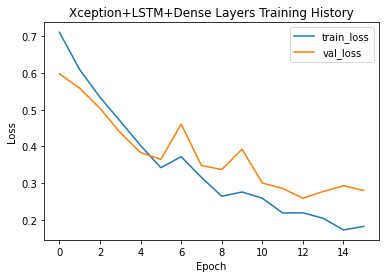

In [25]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (299, 299, 3)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
xception_output = base_model(input_layer, training=False)
flatten = Flatten()(xception_output)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+LSTM+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+LSTM+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+LSTM+Dense Layers Training History")
plt.show()



Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5903 - auc_38: 0.6478 - auc_39: 0.5751 - false_negatives_19: 90.1154 - false_positives_19: 69.8462 - loss: 0.7137 - precision_19: 0.5831 - recall_19: 0.5062 - true_negatives_19: 152.5769 - true_positives_19: 118.2308 - val_accuracy: 0.8300 - val_auc_38: 0.8843 - val_auc_39: 0.8934 - val_false_negatives_19: 16.0000 - val_false_positives_19: 18.0000 - val_loss: 0.5236 - val_precision_19: 0.8302 - val_recall_19: 0.8462 - val_true_negatives_19: 78.0000 - val_true_positives_19: 88.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7786 - auc_38: 0.8804 - auc_39: 0.8775 - false_negatives_19: 64.3846 - false_positives_19: 35.8462 - loss: 0.5119 - precision_19: 0.8068 - recall_19: 0.7072 - true_negatives_19: 186.5769 - true_positives_19: 143.9615 - val_accuracy: 0.7900 - val_auc_38: 0.8638 - val_auc_39: 0.8705 - val_false_negatives_19: 27.0000 - val_false_positives_19: 15.0000 - val_loss: 0.5410 - val_precision

25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9524 - auc_38: 0.9878 - auc_39: 0.9885 - false_negatives_19: 11.3462 - false_positives_19: 8.3462 - loss: 0.1562 - precision_19: 0.9552 - recall_19: 0.9444 - true_negatives_19: 214.0769 - true_positives_19: 197.0000 - val_accuracy: 0.8950 - val_auc_38: 0.9565 - val_auc_39: 0.9575 - val_false_negatives_19: 12.0000 - val_false_positives_19: 9.0000 - val_loss: 0.2868 - val_precision_19: 0.9109 - val_recall_19: 0.8846 - val_true_negatives_19: 87.0000 - val_true_positives_19: 92.0000
Epoch 16/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9537 - auc_38: 0.9876 - auc_39: 0.9874 - false_negatives_19: 12.8462 - false_positives_19: 8.4231 - loss: 0.1593 - precision_19: 0.9585 - recall_19: 0.9445 - true_negatives_19: 214.0000 - true_positives_19: 195.5000 - val_accuracy: 0.9050 - val_auc_38: 0.9521 - val_auc_39: 0.9581 - val_false_negatives_19: 10.0000 - val_false_positives_19: 9.0000 - val_loss: 0.3111 - val_precision_19: 0.9126 - v

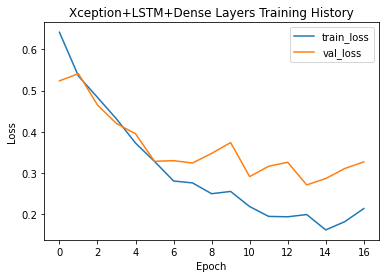

In [26]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (299, 299, 3)

# Load pre-trained Xception model without top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
xception_output = base_model(input_layer, training=False)
flatten = Flatten()(xception_output)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'Xception+LSTM+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception+LSTM+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception+LSTM+Dense Layers Training History")
plt.show()



# Xception+GRU+Dense

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6167 - auc_40: 0.6808 - auc_41: 0.7118 - false_negatives_20: 77.3077 - false_positives_20: 74.5769 - loss: 0.6292 - precision_20: 0.6343 - recall_20: 0.6089 - true_negatives_20: 134.3462 - true_positives_20: 144.5385 - val_accuracy: 0.7500 - val_auc_40: 0.8724 - val_auc_41: 0.8909 - val_false_negatives_20: 39.0000 - val_false_positives_20: 11.0000 - val_loss: 0.5145 - val_precision_20: 0.8553 - val_recall_20: 0.6250 - val_true_negatives_20: 85.0000 - val_true_positives_20: 65.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8529 - auc_40: 0.9229 - auc_41: 0.9323 - false_negatives_20: 37.8846 - false_positives_20: 32.3462 - loss: 0.4331 - precision_20: 0.8749 - recall_20: 0.8390 - true_negatives_20: 176.5769 - true_positives_20: 183.9615 - val_accuracy: 0.7900 - val_auc_40: 0.9007 - val_auc_41: 0.9076 - val_false_negatives_20: 17.0000 - val_false_positives_20: 25.0000 - val_loss: 0.4241 - val_precision_2

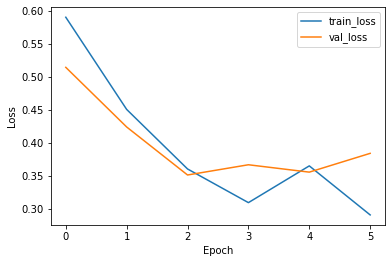

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8256 - auc_40: 0.9233 - auc_41: 0.9394 - false_negatives_20: 16.3750 - false_positives_20: 7.3750 - loss: 0.3656 - precision_20: 0.8880 - recall_20: 0.7729 - true_negatives_20: 55.6250 - true_positives_20: 54.6250
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Model Details:
Model: Xception+GRU+DENSE
Epochs: 6
Test Accuracy: 0.824999988079071
Test Loss: 0.35125163197517395
Validation Accuracy: 0.800000011920929
Validation Loss: 0.3840789198875427
Precision: 0.8791208791208791
Recall: 0.7692307692307693
AUC-ROC: 0.8273237179487178
AUC-PR: 11.0
True Negatives: 85.0
False Positives: 0.7692307829856873
False Negatives: 80.0
True Positives: 0.8791208863258362
Error Rate: 0.48466864492761397
F1 Score: 0.8205128205128205
Cohen's Kappa: 0.6512554802710243
Matthews Correlation Coefficient: 0.6567889118030007
Balanced Accuracy: 0.827323717948718
Time Taken (seconds): 347.49617552757263


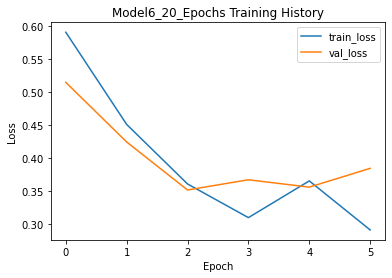

In [27]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten  
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception  # Import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # Resize for Xception
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat channel
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])  # Resize for Xception
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat channel

# Load pre-trained Xception model without the top layer
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))  # Adjust input shape for Xception

# Freeze the layers in Xception
for layer in xception_base.layers:
    layer.trainable = False

# Add custom layers on top of Xception
model = Sequential([
    xception_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'Xception+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Model6(20)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model6_20_Epochs Training History")
plt.show()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6071 - auc_42: 0.6342 - auc_43: 0.6220 - false_negatives_21: 76.5769 - false_positives_21: 84.6538 - loss: 0.7041 - precision_21: 0.6225 - recall_21: 0.6447 - true_negatives_21: 124.2692 - true_positives_21: 145.2692 - val_accuracy: 0.6950 - val_auc_42: 0.8142 - val_auc_43: 0.8126 - val_false_negatives_21: 31.0000 - val_false_positives_21: 30.0000 - val_loss: 0.5678 - val_precision_21: 0.7087 - val_recall_21: 0.7019 - val_true_negatives_21: 66.0000 - val_true_positives_21: 73.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8065 - auc_42: 0.8811 - auc_43: 0.8924 - false_negatives_21: 38.3077 - false_positives_21: 52.5385 - loss: 0.5005 - precision_21: 0.8031 - recall_21: 0.8392 - true_negatives_21: 156.3846 - true_positives_21: 183.5385 - val_accuracy: 0.7900 - val_auc_42: 0.8739 - val_auc_43: 0.8944 - val_false_negatives_21: 35.0000 - val_false_positives_21: 7.0000 - val_loss: 0.4894 - val_precision_21

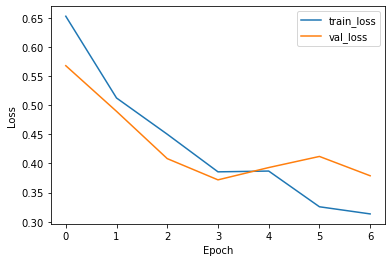

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8495 - auc_42: 0.9390 - auc_43: 0.9513 - false_negatives_21: 8.2500 - false_positives_21: 12.1250 - loss: 0.3672 - precision_21: 0.8465 - recall_21: 0.8810 - true_negatives_21: 50.8750 - true_positives_21: 62.7500
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Model Details:
Model: Xception+GRU+DENSE
Epochs: 7
Test Accuracy: 0.8450000286102295
Test Loss: 0.37182098627090454
Validation Accuracy: 0.8299999833106995
Validation Loss: 0.37884536385536194
Precision: 0.8288288288288288
Recall: 0.8846153846153846
AUC-ROC: 0.843349358974359
AUC-PR: 19.0
True Negatives: 77.0
False Positives: 0.8846153616905212
False Negatives: 92.0
True Positives: 0.8288288116455078
Error Rate: 0.5440966633382369
F1 Score: 0.8558139534883721
Cohen's Kappa: 0.6886299718762555
Matthews Correlation Coefficient: 0.6903383974338944
Balanced Accuracy: 0.843349358974359
Time Taken (seconds): 401.43672347068787


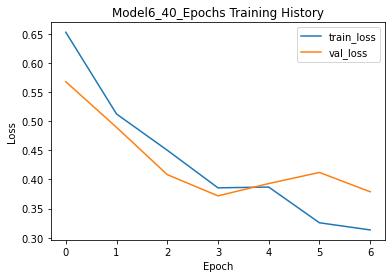

In [28]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten  
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception  # Import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # Resize for Xception
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat channel
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])  # Resize for Xception
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat channel

# Load pre-trained Xception model without the top layer
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))  # Adjust input shape for Xception

# Freeze the layers in Xception
for layer in xception_base.layers:
    layer.trainable = False

# Add custom layers on top of Xception
model = Sequential([
    xception_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'Xception+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Model6(40)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model6_40_Epochs Training History")
plt.show()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5972 - auc_44: 0.6302 - auc_45: 0.6537 - false_negatives_22: 79.1923 - false_positives_22: 86.0000 - loss: 0.6966 - precision_22: 0.6116 - recall_22: 0.6475 - true_negatives_22: 122.9231 - true_positives_22: 142.6538 - val_accuracy: 0.7700 - val_auc_44: 0.8673 - val_auc_45: 0.8705 - val_false_negatives_22: 34.0000 - val_false_positives_22: 12.0000 - val_loss: 0.5318 - val_precision_22: 0.8537 - val_recall_22: 0.6731 - val_true_negatives_22: 84.0000 - val_true_positives_22: 70.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8018 - auc_44: 0.8874 - auc_45: 0.8991 - false_negatives_22: 54.6923 - false_positives_22: 35.4231 - loss: 0.4774 - precision_22: 0.8445 - recall_22: 0.7613 - true_negatives_22: 173.5000 - true_positives_22: 167.1538 - val_accuracy: 0.8200 - val_auc_44: 0.9090 - val_auc_45: 0.9206 - val_false_negatives_22: 26.0000 - val_false_positives_22: 10.0000 - val_loss: 0.4279 - val_precision_2

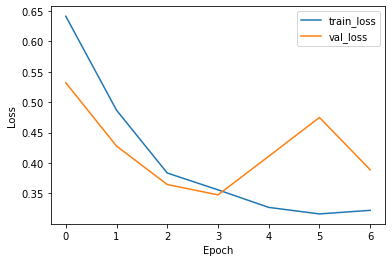

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8549 - auc_44: 0.9394 - auc_45: 0.9474 - false_negatives_22: 9.8750 - false_positives_22: 10.5000 - loss: 0.3415 - precision_22: 0.8605 - recall_22: 0.8708 - true_negatives_22: 52.5000 - true_positives_22: 61.1250
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Model Details:
Model: Xception+GRU+DENSE
Epochs: 7
Test Accuracy: 0.8399999737739563
Test Loss: 0.34773221611976624
Validation Accuracy: 0.800000011920929
Validation Loss: 0.38904017210006714
Precision: 0.8461538461538461
Recall: 0.8461538461538461
AUC-ROC: 0.8397435897435898
AUC-PR: 16.0
True Negatives: 80.0
False Positives: 0.8461538553237915
False Negatives: 88.0
True Positives: 0.8461538553237915
Error Rate: 0.5235720761533907
F1 Score: 0.8461538461538461
Cohen's Kappa: 0.6794871794871795
Matthews Correlation Coefficient: 0.6794871794871795
Balanced Accuracy: 0.8397435897435898
Time Taken (seconds): 401.2027814388275


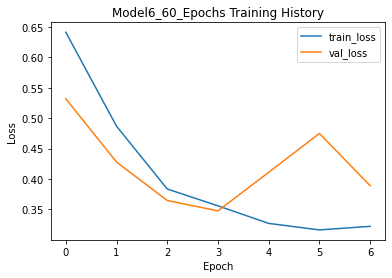

In [29]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten  
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception  # Import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # Resize for Xception
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat channel
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])  # Resize for Xception
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat channel

# Load pre-trained Xception model without the top layer
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))  # Adjust input shape for Xception

# Freeze the layers in Xception
for layer in xception_base.layers:
    layer.trainable = False

# Add custom layers on top of Xception
model = Sequential([
    xception_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'Xception+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Model6(60)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model6_60_Epochs Training History")
plt.show()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6059 - auc_46: 0.6699 - auc_47: 0.6890 - false_negatives_23: 73.6923 - false_positives_23: 86.1154 - loss: 0.6428 - precision_23: 0.6055 - recall_23: 0.6087 - true_negatives_23: 122.8077 - true_positives_23: 148.1538 - val_accuracy: 0.7550 - val_auc_46: 0.8505 - val_auc_47: 0.8567 - val_false_negatives_23: 29.0000 - val_false_positives_23: 20.0000 - val_loss: 0.5325 - val_precision_23: 0.7895 - val_recall_23: 0.7212 - val_true_negatives_23: 76.0000 - val_true_positives_23: 75.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8304 - auc_46: 0.9008 - auc_47: 0.9050 - false_negatives_23: 35.9615 - false_positives_23: 46.3846 - loss: 0.4718 - precision_23: 0.8338 - recall_23: 0.8473 - true_negatives_23: 162.5385 - true_positives_23: 185.8846 - val_accuracy: 0.8250 - val_auc_46: 0.9045 - val_auc_47: 0.9088 - val_false_negatives_23: 25.0000 - val_false_positives_23: 10.0000 - val_loss: 0.4581 - val_precision_2

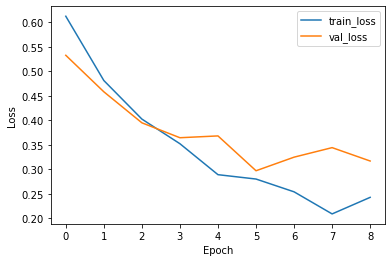

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8729 - auc_46: 0.9477 - auc_47: 0.9589 - false_negatives_23: 10.3750 - false_positives_23: 6.6250 - loss: 0.3034 - precision_23: 0.9043 - recall_23: 0.8547 - true_negatives_23: 56.3750 - true_positives_23: 60.6250
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Model Details:
Model: Xception+GRU+DENSE
Epochs: 9
Test Accuracy: 0.8799999952316284
Test Loss: 0.2971881031990051
Validation Accuracy: 0.8650000095367432
Validation Loss: 0.31702250242233276
Precision: 0.9081632653061225
Recall: 0.8557692307692307
AUC-ROC: 0.8810096153846154
AUC-PR: 9.0
True Negatives: 87.0
False Positives: 0.8557692170143127
False Negatives: 89.0
True Positives: 0.9081632494926453
Error Rate: 0.505478068414943
F1 Score: 0.8811881188118811
Cohen's Kappa: 0.7601918465227817
Matthews Correlation Coefficient: 0.7615616989172537
Balanced Accuracy: 0.8810096153846154
Time Taken (seconds): 511.3895936012268


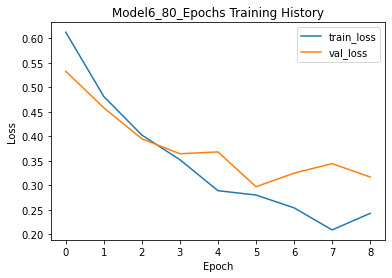

In [30]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten  
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception  # Import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # Resize for Xception
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat channel
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])  # Resize for Xception
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat channel

# Load pre-trained Xception model without the top layer
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))  # Adjust input shape for Xception

# Freeze the layers in Xception
for layer in xception_base.layers:
    layer.trainable = False

# Add custom layers on top of Xception
model = Sequential([
    xception_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'Xception+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Model6(80)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model6_80_Epochs Training History")
plt.show()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5843 - auc_48: 0.6535 - auc_49: 0.6808 - false_negatives_24: 81.0000 - false_positives_24: 82.5769 - loss: 0.6452 - precision_24: 0.6016 - recall_24: 0.6026 - true_negatives_24: 126.3462 - true_positives_24: 140.8462 - val_accuracy: 0.7850 - val_auc_48: 0.9234 - val_auc_49: 0.9290 - val_false_negatives_24: 38.0000 - val_false_positives_24: 5.0000 - val_loss: 0.5181 - val_precision_24: 0.9296 - val_recall_24: 0.6346 - val_true_negatives_24: 91.0000 - val_true_positives_24: 66.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8508 - auc_48: 0.9234 - auc_49: 0.9268 - false_negatives_24: 38.6154 - false_positives_24: 33.5769 - loss: 0.4363 - precision_24: 0.8623 - recall_24: 0.8487 - true_negatives_24: 175.3462 - true_positives_24: 183.2308 - val_accuracy: 0.8300 - val_auc_48: 0.9177 - val_auc_49: 0.9257 - val_false_negatives_24: 11.0000 - val_false_positives_24: 23.0000 - val_loss: 0.4310 - val_precision_

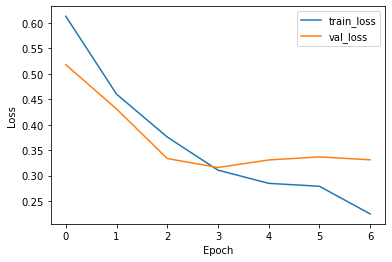

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8636 - auc_48: 0.9381 - auc_49: 0.9519 - false_negatives_24: 13.7500 - false_positives_24: 4.7500 - loss: 0.3247 - precision_24: 0.9282 - recall_24: 0.8100 - true_negatives_24: 58.2500 - true_positives_24: 57.2500
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Model Details:
Model: Xception+GRU+DENSE
Epochs: 7
Test Accuracy: 0.8600000143051147
Test Loss: 0.31573131680488586
Validation Accuracy: 0.8600000143051147
Validation Loss: 0.3308812975883484
Precision: 0.9222222222222223
Recall: 0.7980769230769231
AUC-ROC: 0.8625801282051283
AUC-PR: 7.0
True Negatives: 89.0
False Positives: 0.7980769276618958
False Negatives: 83.0
True Positives: 0.9222221970558167
Error Rate: 0.48237354730492016
F1 Score: 0.8556701030927835
Cohen's Kappa: 0.7211155378486056
Matthews Correlation Coefficient: 0.7282301956244452
Balanced Accuracy: 0.8625801282051282
Time Taken (seconds): 429.841509103775


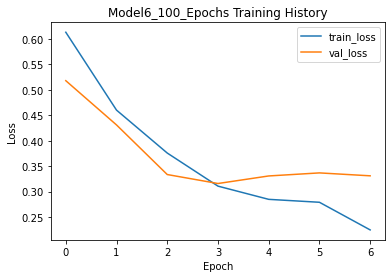

In [31]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten  
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception  # Import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # Resize for Xception
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat channel
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])  # Resize for Xception
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat channel

# Load pre-trained Xception model without the top layer
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))  # Adjust input shape for Xception

# Freeze the layers in Xception
for layer in xception_base.layers:
    layer.trainable = False

# Add custom layers on top of Xception
model = Sequential([
    xception_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'Xception+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Model6(100)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model6_100_Epochs Training History")
plt.show()


# Xception+Attention Mechanism+dense Layers

2024-03-25 13:37:53.313266: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 13:37:53.314481: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 13:37:53.364913: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 13:37:53.599123: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 13:37:54.497183: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 26,107,433 (99.59 MB)

 Trainable params: 5,245,953 (20.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5046 - loss: 0.6933 - val_accuracy: 0.4800 - val_loss: 0.6913
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5186 - loss: 0.6869 - val_accuracy: 0.7050 - val_loss: 0.6525
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7638 - loss: 0.6249 - val_accuracy: 0.8350 - val_loss: 0.5037
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8500 - loss: 0.4536 - val_accuracy: 0.8500 - val_loss: 0.3648
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8913 - loss: 0.3143 - val_accuracy: 0.8700 - val_loss: 0.3217
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9210 - loss: 0.2122 - val_accuracy: 0.8800 - val_loss: 0.3004
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9521 - loss: 0.1698 - val_accuracy: 0.8850 - val_loss: 0.2692
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9647 - loss: 0.1109 - val_accuracy: 0.8800 - val_loss:

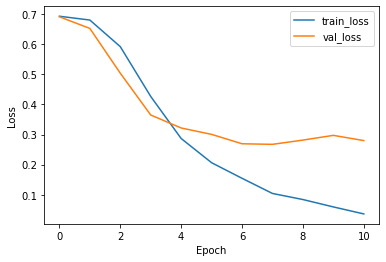

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9000 - loss: 0.2589
Test Accuracy: 88.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step

Confusion Matrix:
[[84 12]
 [12 92]]

Precision: 0.8846153846153846
Recall: 0.8846153846153846
F1 Score: 0.8846153846153846
ROC AUC Score: 0.8798076923076923
Cohen's Kappa Coefficient: 0.7596153846153846
Matthews Correlation Coefficient: 0.7596153846153846
Balanced Accuracy: 0.8798076923076923
Time taken: 526.44 seconds


In [7]:
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train, X_test, y_train, y_test are available

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Attention Mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add Dense Layers for Classification
x = Dense(512, activation='relu')(attention_mul)
output = Dense(1, activation='sigmoid')(x)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate additional metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['Xception with Attention Mechanism'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('metrics7(20).csv', index=False)

In [8]:
print("Base Xception output shape:", base_model.output.shape)
print("Attention probabilities shape:", attention_probs.shape)


Base Xception output shape: (None, 10, 10, 2048)
Attention probabilities shape: (None, 1, 2048)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_12[0][0]    

 Total params: 26,107,433 (99.59 MB)

 Trainable params: 5,245,953 (20.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4917 - loss: 0.6933 - val_accuracy: 0.4800 - val_loss: 0.6924
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5229 - loss: 0.6897 - val_accuracy: 0.5300 - val_loss: 0.6686
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6342 - loss: 0.6478 - val_accuracy: 0.8100 - val_loss: 0.5892
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7913 - loss: 0.5583 - val_accuracy: 0.8500 - val_loss: 0.4386
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8373 - loss: 0.4128 - val_accuracy: 0.8450 - val_loss: 0.3677
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9011 - loss: 0.2912 - val_accuracy: 0.8900 - val_loss: 0.2875
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9255 - loss: 0.2117 - val_accuracy: 0.8950 - val_loss: 0.2535
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9415 - loss: 0.1760 - val_accuracy: 0.8900 - val_loss:

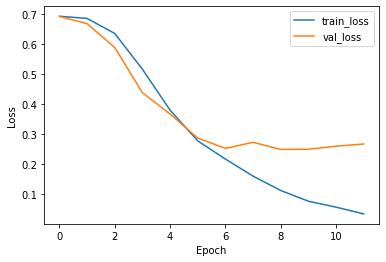

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9222 - loss: 0.2187
Test Accuracy: 89.50%
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step

Confusion Matrix:
[[90  6]
 [15 89]]

Precision: 0.9368421052631579
Recall: 0.8557692307692307
F1 Score: 0.8944723618090453
ROC AUC Score: 0.8966346153846154
Cohen's Kappa Coefficient: 0.7904191616766467
Matthews Correlation Coefficient: 0.793627015902405
Balanced Accuracy: 0.8966346153846154
Time taken: 569.29 seconds


In [9]:
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train, X_test, y_train, y_test are available

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Attention Mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add Dense Layers for Classification
x = Dense(512, activation='relu')(attention_mul)
output = Dense(1, activation='sigmoid')(x)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate additional metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['Xception with Attention Mechanism'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('metrics7(40).csv', index=False)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_24[0][0]    

 Total params: 26,107,433 (99.59 MB)

 Trainable params: 5,245,953 (20.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4704 - loss: 0.6934 - val_accuracy: 0.4800 - val_loss: 0.6927
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5407 - loss: 0.6912 - val_accuracy: 0.4850 - val_loss: 0.6748
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6483 - loss: 0.6568 - val_accuracy: 0.7700 - val_loss: 0.5676
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7696 - loss: 0.5326 - val_accuracy: 0.8350 - val_loss: 0.4044
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8802 - loss: 0.3521 - val_accuracy: 0.8350 - val_loss: 0.3725
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8698 - loss: 0.3041 - val_accuracy: 0.8950 - val_loss: 0.2839
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9164 - loss: 0.2464 - val_accuracy: 0.9050 - val_loss: 0.2726
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9342 - loss: 0.1660 - val_accuracy: 0.8650 - val_loss:

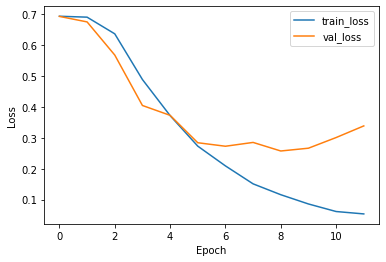

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9215 - loss: 0.2417
Test Accuracy: 91.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step

Confusion Matrix:
[[89  7]
 [11 93]]

Precision: 0.93
Recall: 0.8942307692307693
F1 Score: 0.911764705882353
ROC AUC Score: 0.9106570512820512
Cohen's Kappa Coefficient: 0.8200000000000001
Matthews Correlation Coefficient: 0.8206567882510715
Balanced Accuracy: 0.9106570512820513
Time taken: 569.64 seconds


In [10]:
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train, X_test, y_train, y_test are available

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Attention Mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add Dense Layers for Classification
x = Dense(512, activation='relu')(attention_mul)
output = Dense(1, activation='sigmoid')(x)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate additional metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['Xception with Attention Mechanism'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('metrics7(60).csv', index=False)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_3[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_36 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_36[0][0]    

 Total params: 26,107,433 (99.59 MB)

 Trainable params: 5,245,953 (20.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4936 - loss: 0.6935 - val_accuracy: 0.4850 - val_loss: 0.6929
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5140 - loss: 0.6920 - val_accuracy: 0.4850 - val_loss: 0.6804
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5708 - loss: 0.6644 - val_accuracy: 0.8000 - val_loss: 0.5887
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8242 - loss: 0.5482 - val_accuracy: 0.8450 - val_loss: 0.4500
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8556 - loss: 0.4140 - val_accuracy: 0.8350 - val_loss: 0.3718
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8990 - loss: 0.2820 - val_accuracy: 0.8550 - val_loss: 0.2994
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9159 - loss: 0.2331 - val_accuracy: 0.8850 - val_loss: 0.2993
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9359 - loss: 0.1896 - val_accuracy: 0.8950 - val_loss:

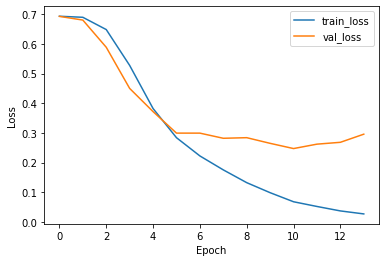

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9298 - loss: 0.2335
Test Accuracy: 91.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step

Confusion Matrix:
[[87  9]
 [ 9 95]]

Precision: 0.9134615384615384
Recall: 0.9134615384615384
F1 Score: 0.9134615384615384
ROC AUC Score: 0.9098557692307692
Cohen's Kappa Coefficient: 0.8197115384615384
Matthews Correlation Coefficient: 0.8197115384615384
Balanced Accuracy: 0.9098557692307692
Time taken: 661.43 seconds


In [11]:
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train, X_test, y_train, y_test are available

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Attention Mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add Dense Layers for Classification
x = Dense(512, activation='relu')(attention_mul)
output = Dense(1, activation='sigmoid')(x)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate additional metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['Xception with Attention Mechanism'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('metrics7(80).csv', index=False)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_4[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_48 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_48[0][0]    

 Total params: 26,107,433 (99.59 MB)

 Trainable params: 5,245,953 (20.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5519 - loss: 0.6929 - val_accuracy: 0.4800 - val_loss: 0.6914
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5182 - loss: 0.6869 - val_accuracy: 0.5300 - val_loss: 0.6664
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6433 - loss: 0.6396 - val_accuracy: 0.7950 - val_loss: 0.5870
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8084 - loss: 0.5557 - val_accuracy: 0.8250 - val_loss: 0.4865
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8768 - loss: 0.4178 - val_accuracy: 0.8500 - val_loss: 0.3781
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8973 - loss: 0.3046 - val_accuracy: 0.8700 - val_loss: 0.3271
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9051 - loss: 0.2487 - val_accuracy: 0.8700 - val_loss: 0.2901
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9268 - loss: 0.1886 - val_accuracy: 0.8900 - v

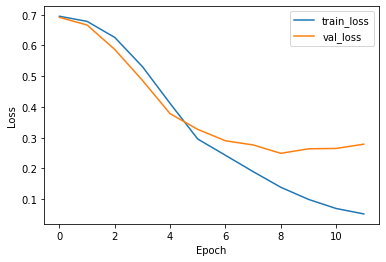

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9310 - loss: 0.2195
Test Accuracy: 91.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step

Confusion Matrix:
[[87  9]
 [ 9 95]]

Precision: 0.9134615384615384
Recall: 0.9134615384615384
F1 Score: 0.9134615384615384
ROC AUC Score: 0.9098557692307692
Cohen's Kappa Coefficient: 0.8197115384615384
Matthews Correlation Coefficient: 0.8197115384615384
Balanced Accuracy: 0.9098557692307692
Time taken: 569.87 seconds


In [12]:
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train, X_test, y_train, y_test are available

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Attention Mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add Dense Layers for Classification
x = Dense(512, activation='relu')(attention_mul)
output = Dense(1, activation='sigmoid')(x)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate additional metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['Xception with Attention Mechanism'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('metrics7(100).csv', index=False)

# Xception+Capsule Network+Dense Layers

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_53      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_53[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_117 (Conv2D) │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │        512 │ conv2d_117[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_336 (Add)       │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add_336[0][0]   

 Total params: 21,144,393 (80.66 MB)

 Trainable params: 21,089,865 (80.45 MB)

 Non-trainable params: 54,528 (213.00 KB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.7385 - loss: 0.5545 - val_accuracy: 0.7250 - val_loss: 0.5762
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.8958 - loss: 0.3398 - val_accuracy: 0.5700 - val_loss: 0.8418
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.9031 - loss: 0.3111 - val_accuracy: 0.7700 - val_loss: 0.5140
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.9313 - loss: 0.2602 - val_accuracy: 0.8150 - val_loss: 0.4706
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.8561 - loss: 0.3932 - val_accuracy: 0.8100 - val_loss: 0.4850
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9261 - loss: 0.2379 - val_accuracy: 0.7750 - val_loss: 0.6256
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.9445 - loss: 0.2103 - val_accuracy: 0.8450 - val_loss: 0.4329
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9409 - loss: 0.2028 - val_accuracy: 0.7400 - val_loss:

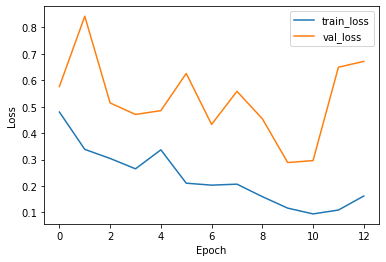

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.8819 - loss: 0.3512
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 676ms/step
Model Details:
Model: Xception + Capsule Network + Dense
Epochs: 20
Test Accuracy: 0.8949999809265137
Test Loss: 0.2888147234916687
Validation Accuracy: 0.7400000095367432
Validation Loss: 0.6711524724960327
Precision: 0.946236559139785
Recall: 0.8461538461538461
AUC-ROC: 0.8970352564102564
True Negatives: 91
False Positives: 5
False Negatives: 16
True Positives: 88
Error Rate: 0.10500001907348633
F1 Score: 0.8934010152284263
Cohen's Kappa: 0.7905863581970483
Matthews Correlation Coefficient: 0.7953860910462723
Balanced Accuracy: 0.8970352564102564
Time Taken (seconds): 1153.1290652751923


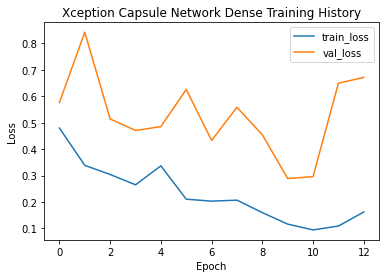

In [35]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load Xception model
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling layer
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
# Calculate Precision, Recall, F1 Score, Cohen's Kappa Coefficient, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'Xception + Capsule Network + Dense',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception_Model8_Metrics(20).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception Capsule Network Dense Training History")
plt.show()



Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_54      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_54[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_121 (Conv2D) │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │        512 │ conv2d_121[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_348 (Add)       │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add_348[0][0]   

 Total params: 21,144,393 (80.66 MB)

 Trainable params: 21,089,865 (80.45 MB)

 Non-trainable params: 54,528 (213.00 KB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.7352 - loss: 0.5638 - val_accuracy: 0.5350 - val_loss: 0.9350
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.8731 - loss: 0.3776 - val_accuracy: 0.6950 - val_loss: 0.5691
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.8597 - loss: 0.3698 - val_accuracy: 0.8400 - val_loss: 0.3856
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9154 - loss: 0.2885 - val_accuracy: 0.8050 - val_loss: 0.4756
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9303 - loss: 0.2423 - val_accuracy: 0.5200 - val_loss: 1.2251
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9271 - loss: 0.2506 - val_accuracy: 0.7300 - val_loss: 0.7202
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


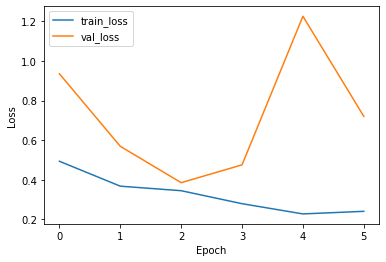

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 588ms/step - accuracy: 0.8487 - loss: 0.3632
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 659ms/step
Model Details:
Model: Xception + Capsule Network + Dense
Epochs: 40
Test Accuracy: 0.8399999737739563
Test Loss: 0.3855878412723541
Validation Accuracy: 0.7300000190734863
Validation Loss: 0.7202430367469788
Precision: 0.8157894736842105
Recall: 0.8942307692307693
AUC-ROC: 0.8377403846153846
True Negatives: 75
False Positives: 21
False Negatives: 11
True Positives: 93
Error Rate: 0.1600000262260437
F1 Score: 0.8532110091743119
Cohen's Kappa: 0.6781979082864038
Matthews Correlation Coefficient: 0.68165342966454
Balanced Accuracy: 0.8377403846153846
Time Taken (seconds): 544.7842376232147


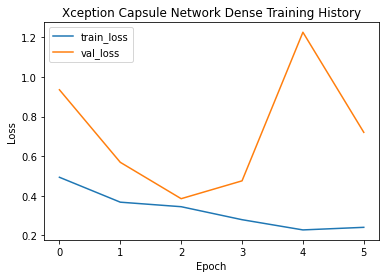

In [36]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load Xception model
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling layer
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
# Calculate Precision, Recall, F1 Score, Cohen's Kappa Coefficient, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'Xception + Capsule Network + Dense',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception_Model8_Metrics(40).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception Capsule Network Dense Training History")
plt.show()



Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_55      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_55[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_125 (Conv2D) │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │        512 │ conv2d_125[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_360 (Add)       │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add_360[0][0]   

 Total params: 21,144,393 (80.66 MB)

 Trainable params: 21,089,865 (80.45 MB)

 Non-trainable params: 54,528 (213.00 KB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.7357 - loss: 0.5630 - val_accuracy: 0.6500 - val_loss: 0.6801
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.8994 - loss: 0.3358 - val_accuracy: 0.7800 - val_loss: 0.5228
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9022 - loss: 0.3228 - val_accuracy: 0.5700 - val_loss: 0.9364
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9089 - loss: 0.2740 - val_accuracy: 0.4800 - val_loss: 1.1822
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.9245 - loss: 0.2548 - val_accuracy: 0.7600 - val_loss: 0.6487
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


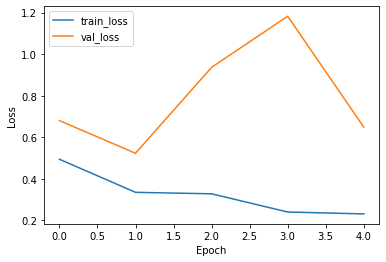

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 587ms/step - accuracy: 0.7800 - loss: 0.5351
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 666ms/step
Model Details:
Model: Xception + Capsule Network + Dense
Epochs: 60
Test Accuracy: 0.7799999713897705
Test Loss: 0.5228429436683655
Validation Accuracy: 0.7599999904632568
Validation Loss: 0.6486757397651672
Precision: 0.96875
Recall: 0.5961538461538461
AUC-ROC: 0.7876602564102564
True Negatives: 94
False Positives: 2
False Negatives: 42
True Positives: 62
Error Rate: 0.2200000286102295
F1 Score: 0.738095238095238
Cohen's Kappa: 0.5662460567823344
Matthews Correlation Coefficient: 0.6161730564400351
Balanced Accuracy: 0.7876602564102564
Time Taken (seconds): 456.4554078578949


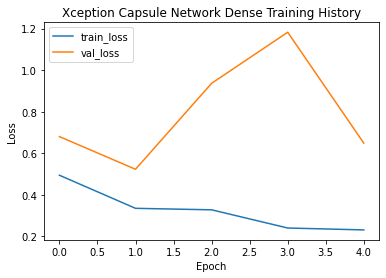

In [37]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load Xception model
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling layer
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
# Calculate Precision, Recall, F1 Score, Cohen's Kappa Coefficient, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'Xception + Capsule Network + Dense',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception_Model8_Metrics(60).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception Capsule Network Dense Training History")
plt.show()



Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_56      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_56[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_129 (Conv2D) │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │        512 │ conv2d_129[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_372 (Add)       │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add_372[0][0]   

 Total params: 21,144,393 (80.66 MB)

 Trainable params: 21,089,865 (80.45 MB)

 Non-trainable params: 54,528 (213.00 KB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.7504 - loss: 0.5516 - val_accuracy: 0.6100 - val_loss: 0.8150
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9228 - loss: 0.3057 - val_accuracy: 0.7250 - val_loss: 0.6026
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.8993 - loss: 0.3196 - val_accuracy: 0.8950 - val_loss: 0.3024
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9301 - loss: 0.2579 - val_accuracy: 0.7350 - val_loss: 0.6226
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9636 - loss: 0.1902 - val_accuracy: 0.6900 - val_loss: 0.7832
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9626 - loss: 0.1635 - val_accuracy: 0.8450 - val_loss: 0.4086
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


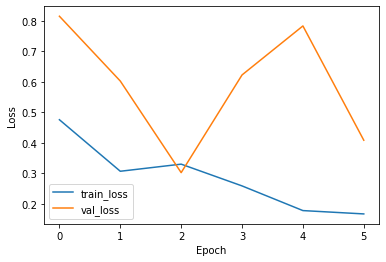

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 0.8912 - loss: 0.3256
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 655ms/step
Model Details:
Model: Xception + Capsule Network + Dense
Epochs: 80
Test Accuracy: 0.8949999809265137
Test Loss: 0.30238690972328186
Validation Accuracy: 0.8450000286102295
Validation Loss: 0.4085780084133148
Precision: 0.9108910891089109
Recall: 0.8846153846153846
AUC-ROC: 0.8954326923076923
True Negatives: 87
False Positives: 9
False Negatives: 12
True Positives: 92
Error Rate: 0.10500001907348633
F1 Score: 0.8975609756097561
Cohen's Kappa: 0.7899159663865546
Matthews Correlation Coefficient: 0.7902719536136751
Balanced Accuracy: 0.8954326923076923
Time Taken (seconds): 541.9070508480072


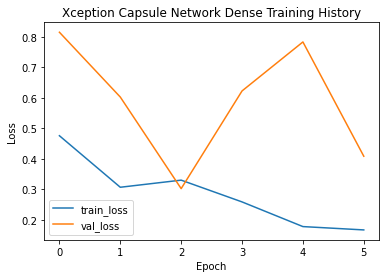

In [38]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load Xception model
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling layer
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
# Calculate Precision, Recall, F1 Score, Cohen's Kappa Coefficient, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'Xception + Capsule Network + Dense',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception_Model8_Metrics(80).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception Capsule Network Dense Training History")
plt.show()



Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_57      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_57[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_133 (Conv2D) │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │        512 │ conv2d_133[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_384 (Add)       │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add_384[0][0]   

 Total params: 21,144,393 (80.66 MB)

 Trainable params: 21,089,865 (80.45 MB)

 Non-trainable params: 54,528 (213.00 KB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.7258 - loss: 0.5716 - val_accuracy: 0.6400 - val_loss: 0.6801
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.8705 - loss: 0.3825 - val_accuracy: 0.7450 - val_loss: 0.5618
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.8988 - loss: 0.3070 - val_accuracy: 0.8850 - val_loss: 0.3661
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9355 - loss: 0.2634 - val_accuracy: 0.7050 - val_loss: 0.8206
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9351 - loss: 0.2312 - val_accuracy: 0.5300 - val_loss: 1.2356
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.9214 - loss: 0.2585 - val_accuracy: 0.7700 - val_loss: 0.7031
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


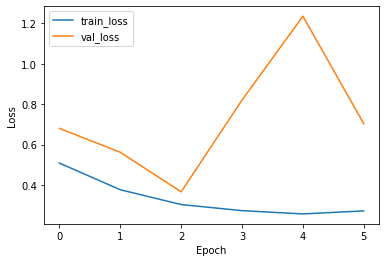

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 600ms/step - accuracy: 0.8782 - loss: 0.3626
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step
Model Details:
Model: Xception + Capsule Network + Dense
Epochs: 100
Test Accuracy: 0.8849999904632568
Test Loss: 0.36613374948501587
Validation Accuracy: 0.7699999809265137
Validation Loss: 0.7030914425849915
Precision: 0.8584070796460177
Recall: 0.9326923076923077
AUC-ROC: 0.8830128205128205
True Negatives: 80
False Positives: 16
False Negatives: 7
True Positives: 97
Error Rate: 0.11500000953674316
F1 Score: 0.8940092165898617
Cohen's Kappa: 0.7687977482911138
Matthews Correlation Coefficient: 0.7719634618734974
Balanced Accuracy: 0.8830128205128205
Time Taken (seconds): 555.525315284729


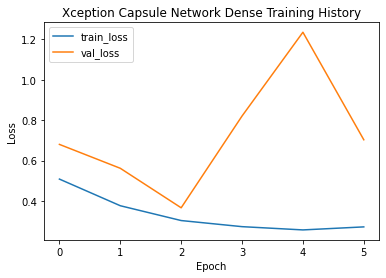

In [39]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of Xception

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load Xception model
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling layer
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
# Calculate Precision, Recall, F1 Score, Cohen's Kappa Coefficient, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'Xception + Capsule Network + Dense',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Xception_Model8_Metrics(100).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Xception Capsule Network Dense Training History")
plt.show()

